In [ ]:
pip install mlxtend

In [ ]:
#External package need to install
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=b27951293c1919937e4198652904b57ef34be14c6fd0d132318273d1c7a96ccf
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
pip install squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/usml_data/

/content/drive/MyDrive/usml_data


In [ ]:
import ast

# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# # for defining path
# import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df_data = pd.read_csv('out_full.txt', sep='\n', header=None, names=['ner'])

In [ ]:
data = [ast.literal_eval(x) for x in df_data['ner'].values]

dataset = []

for i in data:
    tup = []
    for j in i:
        if 'Drug' in j:
            tup.append(j)
    if len(tup) > 0:
        dataset.append(tup)

In [ ]:
df = pd.DataFrame.from_records(dataset)

In [ ]:
df.head

<bound method NDFrame.head of                        0                                        1    ...   152   153
0        (Drug, Augmentin)                          (Drug, Bactrim)  ...  None  None
1          (Drug, Demerol)                        (Drug, diltiazem)  ...  None  None
2    (Drug, Nitroglycerin)                            (Drug, lasix)  ...  None  None
3     (Drug, Erythromycin)                       (Drug, Ampicillin)  ...  None  None
4        (Drug, Coumadin))               (Drug, calcium gluconate,)  ...  None  None
..                     ...                                      ...  ...   ...   ...
969    (Drug, Penicillins)  (Drug, Sulfa (Sulfonamide Antibiotics))  ...  None  None
970      (Drug, CONTRAST;)                        (Drug, Contrast:)  ...  None  None
971        (Drug, Codeine)    (Drug, Trimethoprim-Sulfamethoxazole)  ...  None  None
972        (Drug, Aspirin)                      (Drug, Penicillins)  ...  None  None
973          (Drug, NSAID)         

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
count,974,959,943,933,913,906,891,876,864,847,834,819,806,789,771,759,739,721,704,682,665,654,630,617,602,589,570,554,540,520,503,482,468,454,438,424,415,401,385,370,...,11,9,8,8,7,5,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1
unique,538,590,576,621,584,599,598,581,571,547,552,543,530,539,521,501,501,503,461,458,472,463,432,445,422,413,401,384,373,375,371,362,344,337,331,307,311,312,286,277,...,11,9,8,8,7,5,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1
top,"(Drug, Penicillins)","(Drug, Penicillins)","(Drug, Aspirin)","(Drug, lasix)","(Drug, heparin)","(Drug, lasix)","(Drug, heparin)","(Drug, Aspirin)","(Drug, aspirin)","(Drug, metoprolol)","(Drug, Coumadin)","(Drug, Aspirin)","(Drug, Lasix)","(Drug, heparin)","(Drug, Lasix)","(Drug, Lasix)","(Drug, Aspirin)","(Drug, antibiotics)","(Drug, heparin)","(Drug, Coumadin)","(Drug, Lasix)","(Drug, Aspirin)","(Drug, Aspirin)","(Drug, Aspirin)","(Drug, aspirin)","(Drug, Lisinopril)","(Drug, Lisinopril)","(Drug, Coumadin)","(Drug, lisinopril)","(Drug, Heparin)","(Drug, Aspirin)","(Drug, Lasix)","(Drug, Lasix)","(Drug, Lasix)","(Drug, Lisinopril)","(Drug, Aspirin)","(Drug, antibiotics)","(Drug, coumadin)","(Drug, Aspirin)","(Drug, Aspirin)",...,"(Drug, Linezolid)","(Drug, Flonase)","(Drug, lasix)","(Drug, ondansetron HCl (PF))","(Drug, diuretics.)","(Drug, Coumadin ()","(Drug, cipro)","(Drug, prednisone)","(Drug, lasix)","(Drug, warfarin)","(Drug, Coumadin ()","(Drug, steroids))","(Drug, warfarin.)","(Drug, Docusate Sodium)","(Drug, steroids))","(Drug, vitamin K)","(Drug, warfarin.)","(Drug, vitamin K)","(Drug, vitamin K)","(Drug, vitamin K)","(Drug, Vitamins)","(Drug, Mycophenolate Mofetil)","(Drug, warfarin)","(Drug, Coumadin?)","(Drug, Sulfamethoxazole-Trimethoprim)","(Drug, Coumadin?)","(Drug, warfarin)","(Drug, Epoetin Alfa)","(Drug, warfarin)","(Drug, Coumadin?)","(Drug, warfarin)","(Drug, Warfarin)","(Drug, Valganciclovir)","(Drug, Ondansetron)","(Drug, Dextrose)","(Drug, Vancomycin)","(Drug, Vancomycin)","(Drug, heparin sodium)","(Drug, Vancomycin)","(Drug, Normal\nSaline\n-)"
freq,72,12,14,13,16,9,15,11,12,9,11,16,17,13,13,12,17,8,11,9,9,13,14,11,9,13,9,12,8,7,10,7,9,7,9,10,8,7,8,8,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


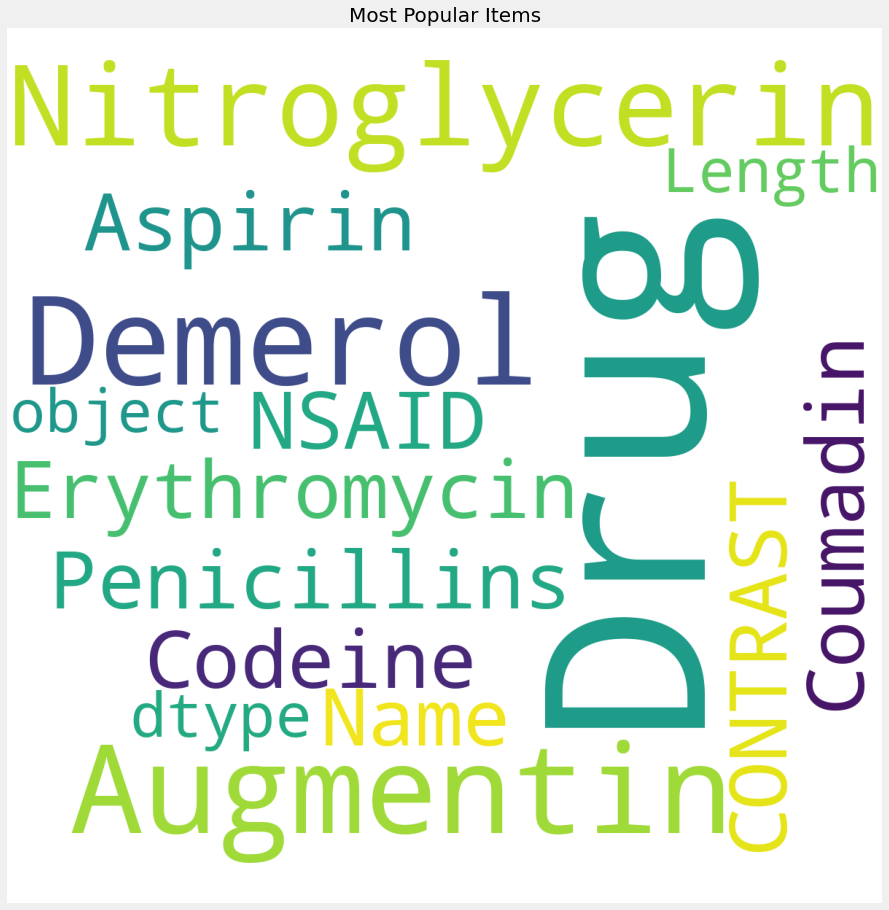

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

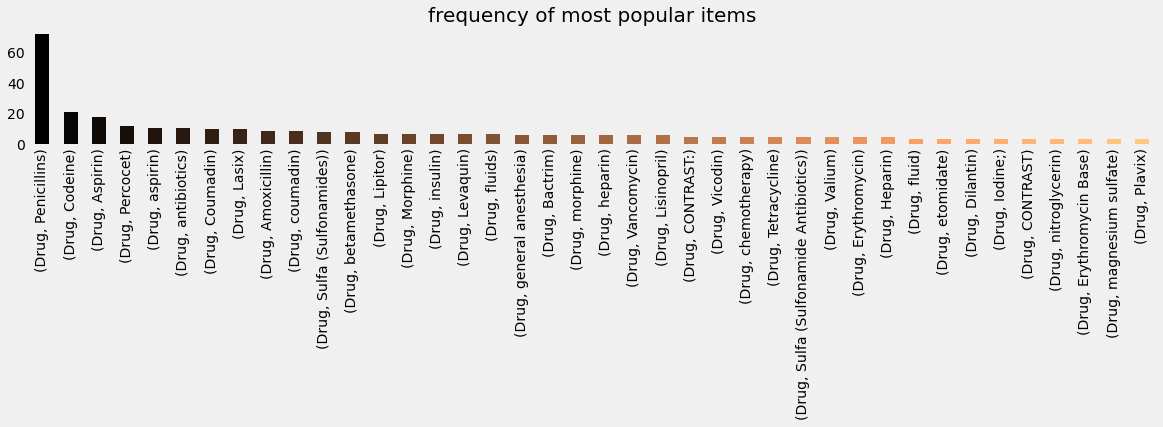

In [ ]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 2)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
df[0].value_counts().head(40)

(Drug, Penicillins)                        72
(Drug, Codeine)                            21
(Drug, Aspirin)                            18
(Drug, Percocet)                           12
(Drug, aspirin)                            11
(Drug, antibiotics)                        11
(Drug, Coumadin)                           10
(Drug, Lasix)                              10
(Drug, Amoxicillin)                         9
(Drug, coumadin)                            9
(Drug, Sulfa (Sulfonamides))                8
(Drug, betamethasone)                       8
(Drug, Lipitor)                             7
(Drug, Morphine)                            7
(Drug, insulin)                             7
(Drug, Levaquin)                            7
(Drug, fluids)                              7
(Drug, general anesthesia)                  6
(Drug, Bactrim)                             6
(Drug, morphine)                            6
(Drug, heparin)                             6
(Drug, Vancomycin)                

In [ ]:
y = df[0].value_counts().head(50).to_frame()

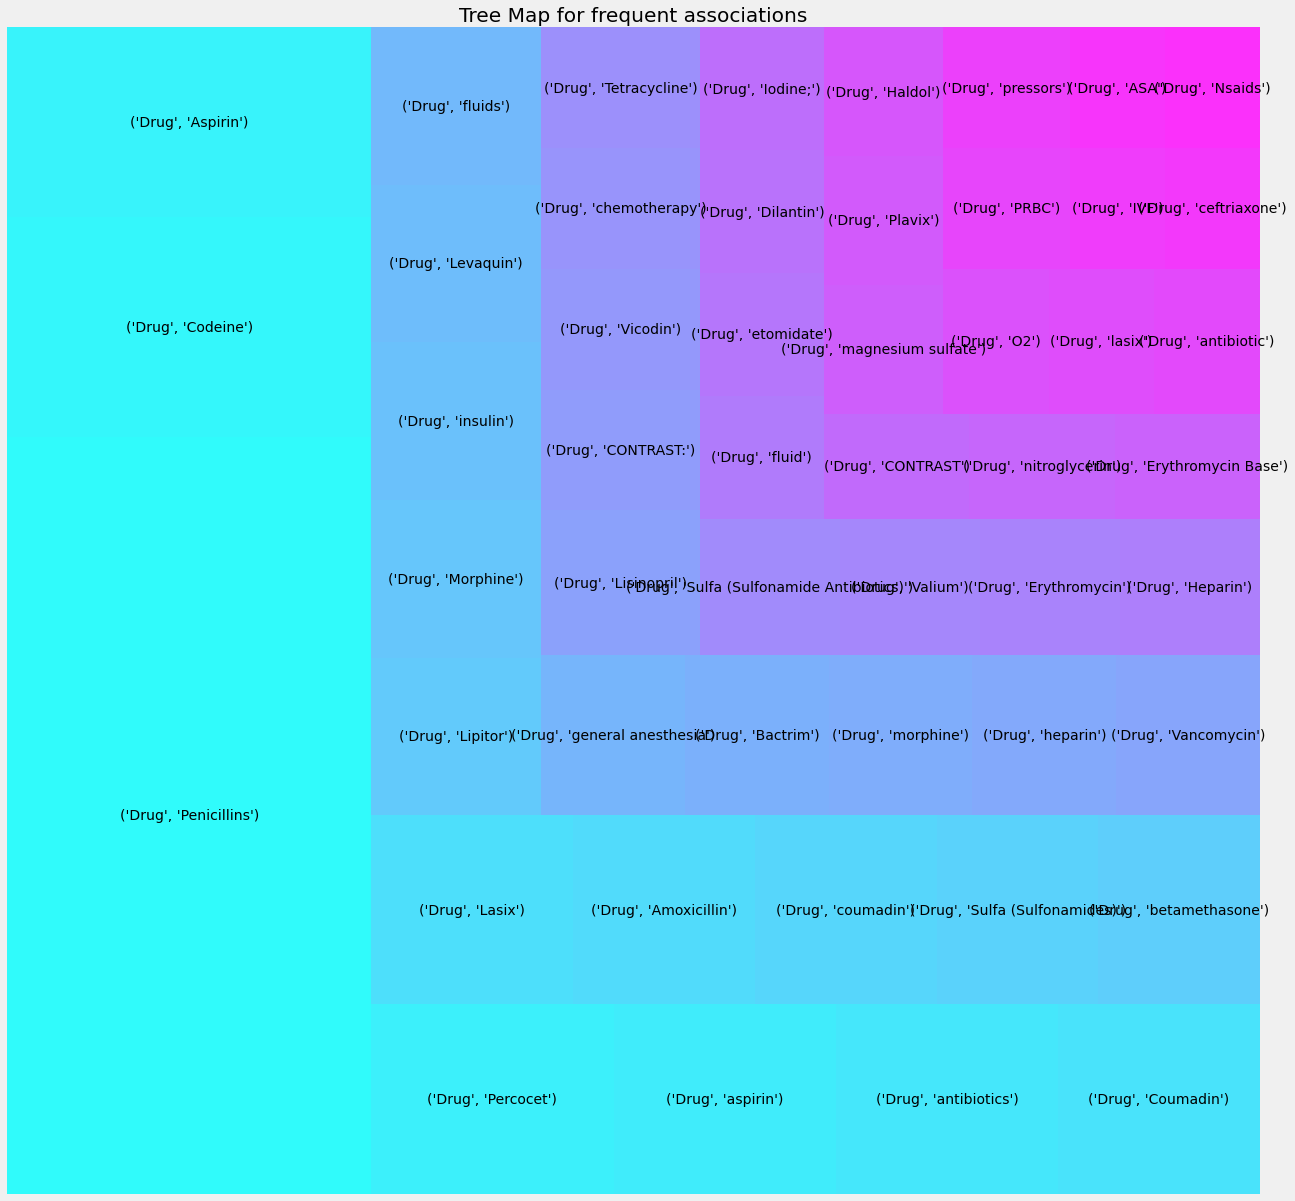

In [ ]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for frequent associations')
plt.axis('off')
plt.show()

In [ ]:
df['drug'] = 'drug'
drug = df.truncate(before = -1, after = 15)


import networkx as nx
drug = nx.from_pandas_edgelist(drug, source = 'drug', target = 0, edge_attr = True)

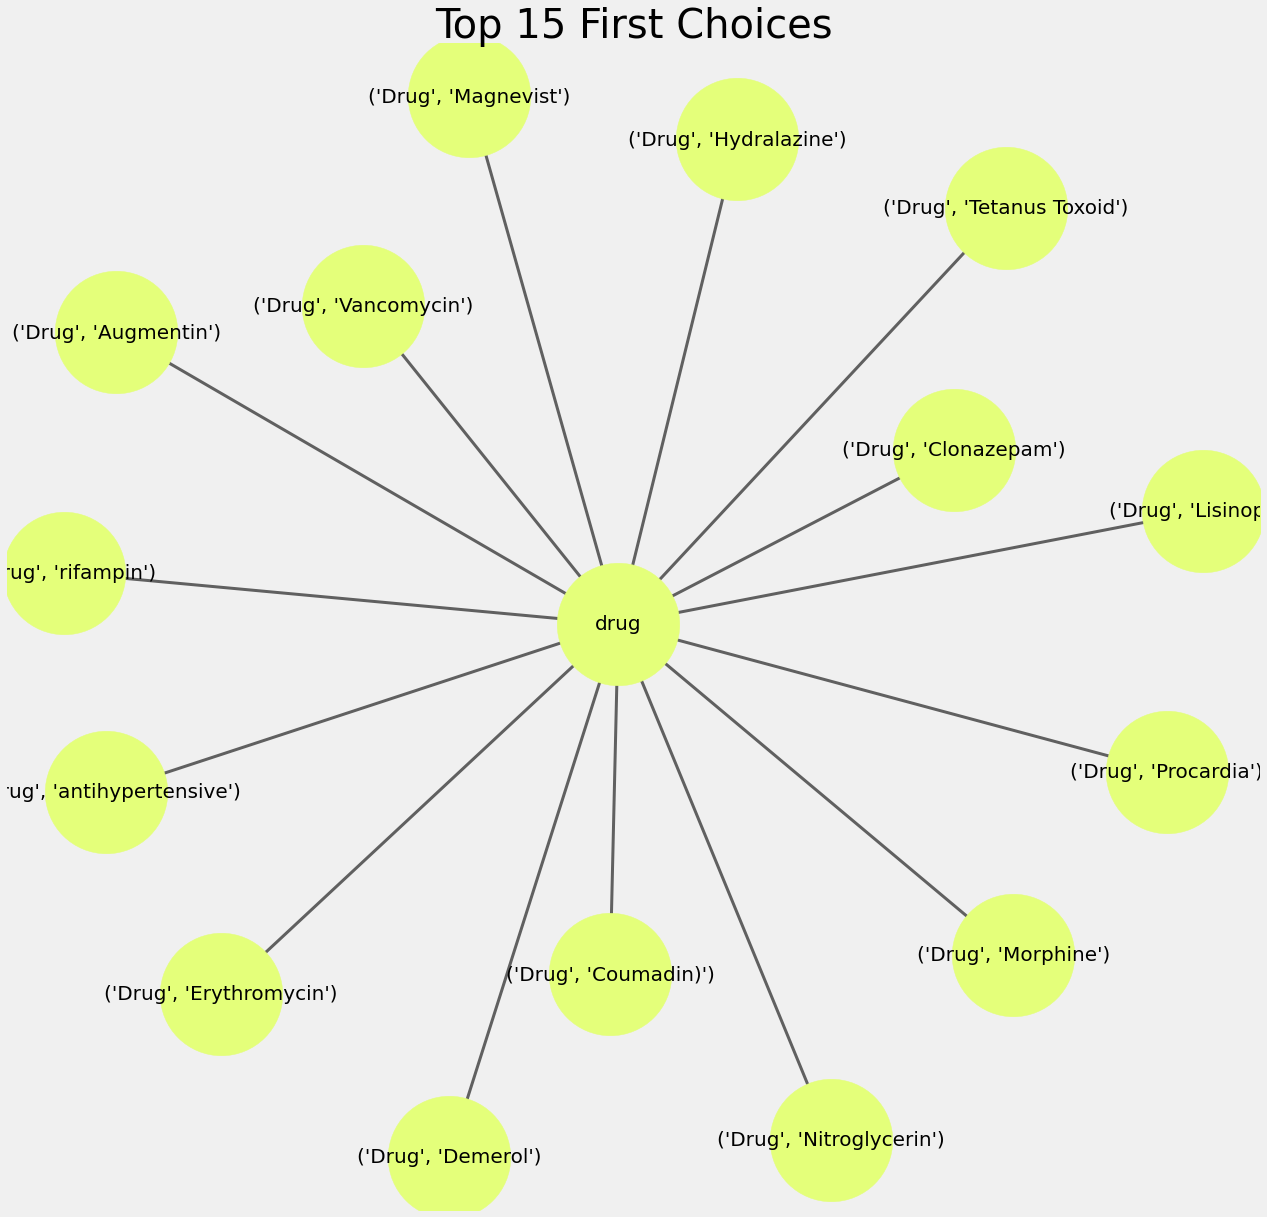

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(drug)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(drug, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(drug, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(drug, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [ ]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'drug', target = 1, edge_attr = True)

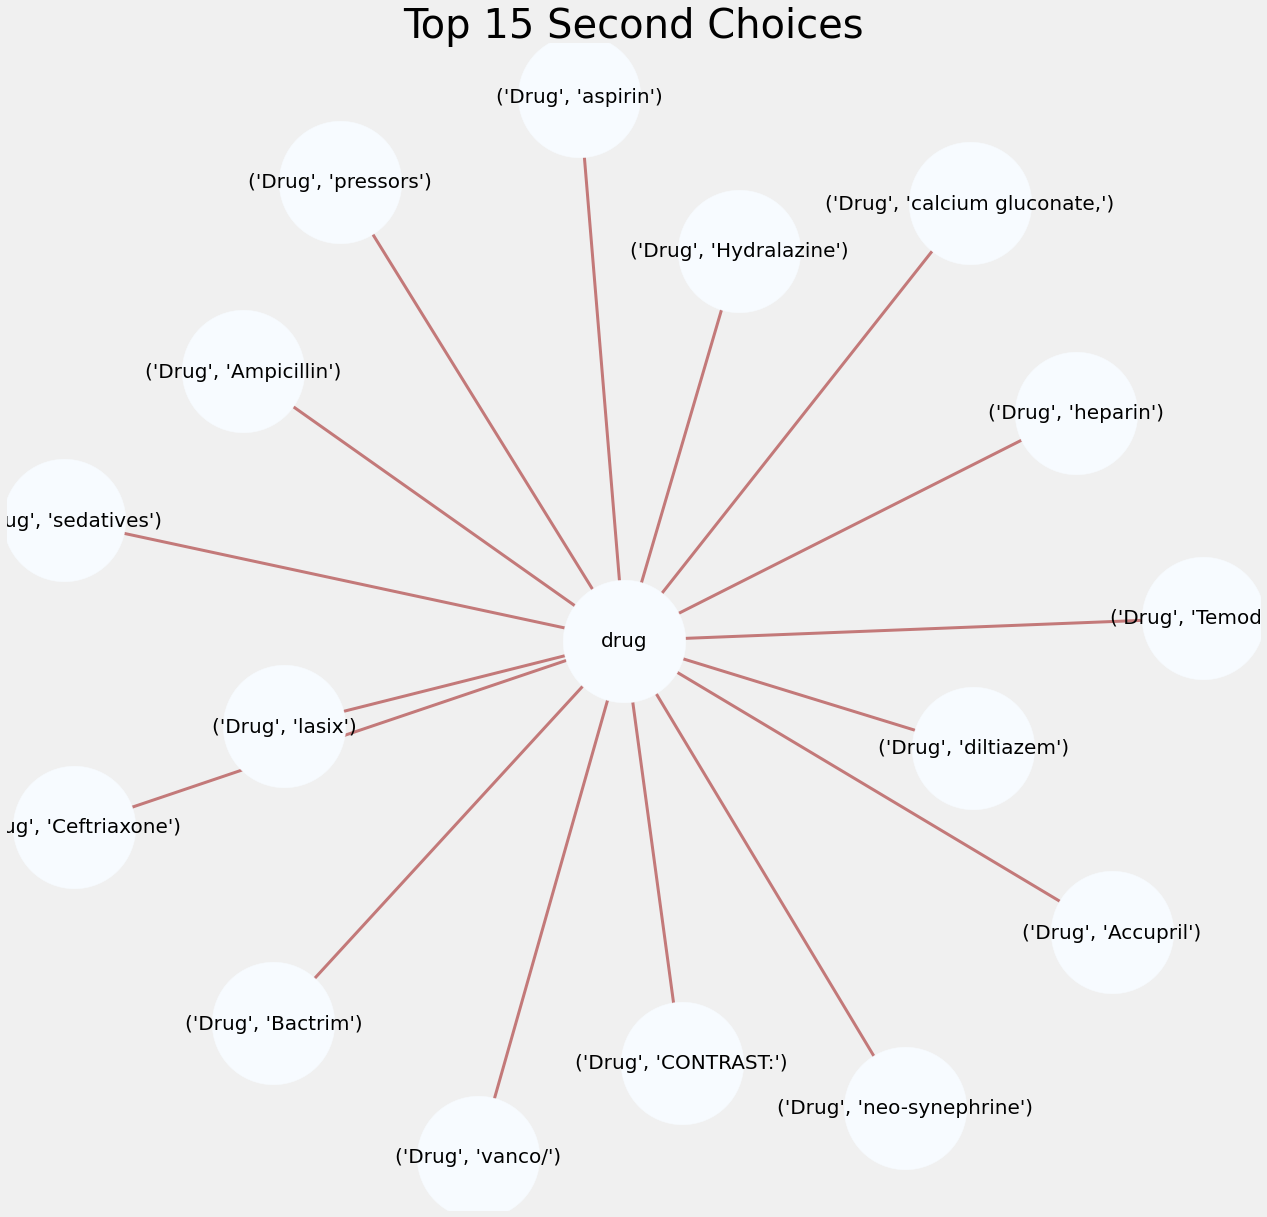

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [ ]:
df['thirdchoice'] = 'Third Choice'
secondchoice = df.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'drug', target = 2, edge_attr = True)

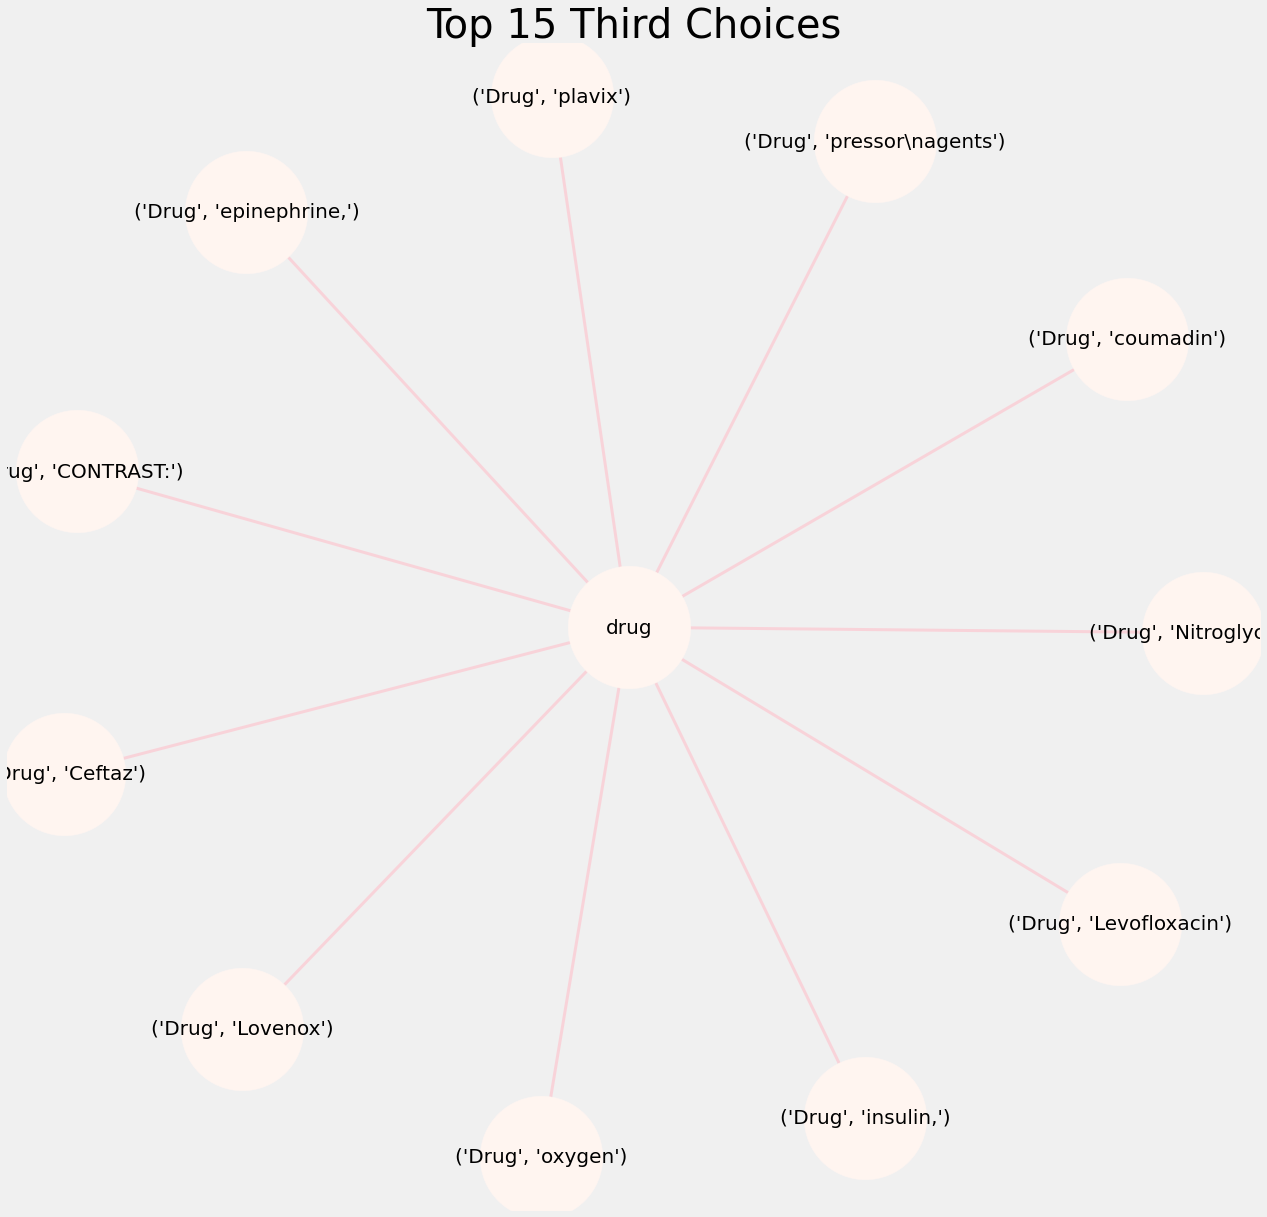

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Third Choices', fontsize = 40)
plt.show()

In [ ]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 974):
    trans.append([str(df.values[i,j]) for j in range(0, 153)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(974, 153)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(974, 6456)

In [ ]:
data

,"('Drug', ""Caduet'"")","('Drug', ""IVF's"")","('Drug', ""IVF's,"")","('Drug', ""K'cl"")","('Drug', ""MAE's"")","('Drug', ""MEN'S]"")","('Drug', ""MVI'"")","('Drug', ""Nasocort',"")","('Drug', ""PRBC's"")","('Drug', ""PRBC's,"")","('Drug', ""mother's milk."")","('Drug', ""pRBC's"")","('Drug', '(Latanoprost)')","('Drug', '+ D(3)')","('Drug', ', medium-chain\n triglyceride oil')","('Drug', '- Atrovent')","('Drug', '-2')","('Drug', '-4')","('Drug', '-Coa Reductase Inhibitors')","('Drug', '-HTN medications.')","('Drug', '-In')","('Drug', '-In-')","('Drug', '-Mag-')","('Drug', '-coagulation.')","('Drug', '-steroidal anti-inflammatories\n(')","('Drug', '-tPA')","('Drug', '/SULBACTAM')","('Drug', '/SULBACTAM-')","('Drug', '/SULFA-')","('Drug', '10687')","('Drug', '197')","('Drug', '4')","('Drug', '5-FU')","('Drug', '5-FU/')","('Drug', '5348')","('Drug', '5FU')","('Drug', '5FU,')","('Drug', '5FU.')","('Drug', '5FU/')","('Drug', 'A THRU Z')",...,"('Drug', 'warm')","('Drug', 'water.')","('Drug', 'wellbutrin')","('Drug', 'white petrolatum-mineral oil')","('Drug', 'wound')","('Drug', 'xalatan')","('Drug', 'xalatan,')","('Drug', 'xanax')","('Drug', 'xanax,')","('Drug', 'xanthochromic')","('Drug', 'xeroform')","('Drug', 'zantac')","('Drug', 'zaroxalyn')","('Drug', 'zenapax')","('Drug', 'zetia')","('Drug', 'zinc sulfate')","('Drug', 'zinc sulfate,')","('Drug', 'zinc')","('Drug', 'zithro,')","('Drug', 'zocor (simvastatin)')","('Drug', 'zocor')","('Drug', 'zocor,')","('Drug', 'zocor.')","('Drug', 'zofran')","('Drug', 'zofran,')","('Drug', 'zofran.')","('Drug', 'zofran\n- Protonix')","('Drug', 'zoloft')","('Drug', 'zolpidem')","('Drug', 'zolpidem)')","('Drug', 'zometa.')","('Drug', 'zosyn')","('Drug', 'zosyn,')","('Drug', 'zosyn.')","('Drug', 'zosyn/')","('Drug', 'zyban,')","('Drug', 'zyprexa')","('Drug', 'zyprexa,')","('Drug', 'zyprexa.')",None
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

filtered_cols = ["('Drug', 'Penicillins')", "('Drug', 'Codeine')", "('Drug', 'Aspirin')", "('Drug', 'Percocet')", "('Drug', 'antibiotics')", "('Drug', 'Coumadin')", "('Drug', 'Lasix')",
                "('Drug', 'Amoxicillin')", "('Drug', 'Sulfa (Sulfonamides)')", "('Drug', 'betamethasone')", "('Drug', 'Lipitor')", "('Drug', 'Morphine')", "('Drug', 'insulin')",
                "('Drug', 'Lipitor')", "('Drug', 'Levaquin')", "('Drug', 'fluid's)", "('Drug', 'general anesthesia')", "('Drug', 'Bactrim')", "('Drug', 'Heparin')", "('Drug', 'Vancomycin')"]

data = data.reindex(columns = filtered_cols)

# '(Drug, Penicillins)', '(Drug, Codeine)', '(Drug, Aspirin)', '(Drug, Percocet)', '(Drug, antibiotics)', '(Drug, Coumadin)', '(Drug, Lasix)',
# '(Drug, Amoxicillin)', '(Drug, Sulfa (Sulfonamides))', '(Drug, betamethasone)', '(Drug, Lipitor)', '(Drug, Morphine)', '(Drug, insulin)',
# '(Drug, Lipitor)', '(Drug, Levaquin)', '(Drug, fluids)', '(Drug, general anesthesia)', '(Drug, Bactrim)', '(Drug, Heparin)', '(Drug, Vancomycin)',
# '(Drug, Lisinopril)', '(Drug, Vicodin)', '(Drug, Sulfa (Sulfonamide Antibiotics))', '(Drug, chemotherapy)', '(Drug, Tetracycline)',
# '(Drug, Erythromycin)', '(Drug, Dilantin)', '(Drug, Valium)', '(Drug, etomidate)', '(Drug, nitroglycerin)', '(Drug, morphine)', '(Drug, heparin)',
# '(Drug, Iodine;)', '(Drug, Plavix)'

# checking the shape
data.shape

(974, 20)

In [ ]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.020534,"(('Drug', 'ACE inhibitor'))"
1,0.018480,"(('Drug', 'ACEI'))"
2,0.010267,"(('Drug', 'AMPICILLIN'))"
3,0.137577,"(('Drug', 'ASA'))"
4,0.025667,"(('Drug', 'ASA,'))"
...,...,...
17600,0.010267,"(('Drug', 'Furosemide'), ('Drug', 'Aspirin'), ..."
17601,0.013347,"(('Drug', 'Furosemide'), ('Drug', 'Aspirin'), ..."
17602,0.010267,"(('Drug', 'Aspirin,'), ('Drug', 'Docusate (Col..."
17603,0.010267,"(('Drug', 'Coumadin'), ('Drug', 'heparin'), ('..."


In [ ]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.137577,"(('Drug', 'ASA'))",1
1,0.182752,"(('Drug', 'Acetaminophen'))",1
2,0.055441,"(('Drug', 'Albuterol Sulfate'))",1
3,0.107803,"(('Drug', 'Albuterol'))",1
4,0.110883,"(('Drug', 'Amiodarone'))",1
...,...,...,...
365,0.083162,"(None, ('Drug', 'Aspirin'), ('Drug', 'Docusate...",4
366,0.054415,"(None, ('Drug', 'Senna'), ('Drug', 'Aspirin'),...",4
367,0.056468,"(('Drug', 'Furosemide'), ('Drug', 'Aspirin'), ...",4
368,0.050308,"(None, ('Drug', 'Aspirin'), ('Drug', 'coumadin...",4


In [ ]:
frequent_itemsets['itemsets'].values[-1]

frozenset({"('Drug', 'Docusate Sodium')",
           "('Drug', 'Furosemide')",
           "('Drug', 'Metoprolol Tartrate')",
           'None'})

In [ ]:
frequent_itemsets['itemsets'].values[-2]

frozenset({"('Drug', 'Aspirin')",
           "('Drug', 'Warfarin')",
           "('Drug', 'coumadin')",
           'None'})

In [ ]:
frequent_itemsets['itemsets'].values[-3]

frozenset({"('Drug', 'Aspirin')",
           "('Drug', 'Furosemide')",
           "('Drug', 'Metoprolol Tartrate')",
           'None'})

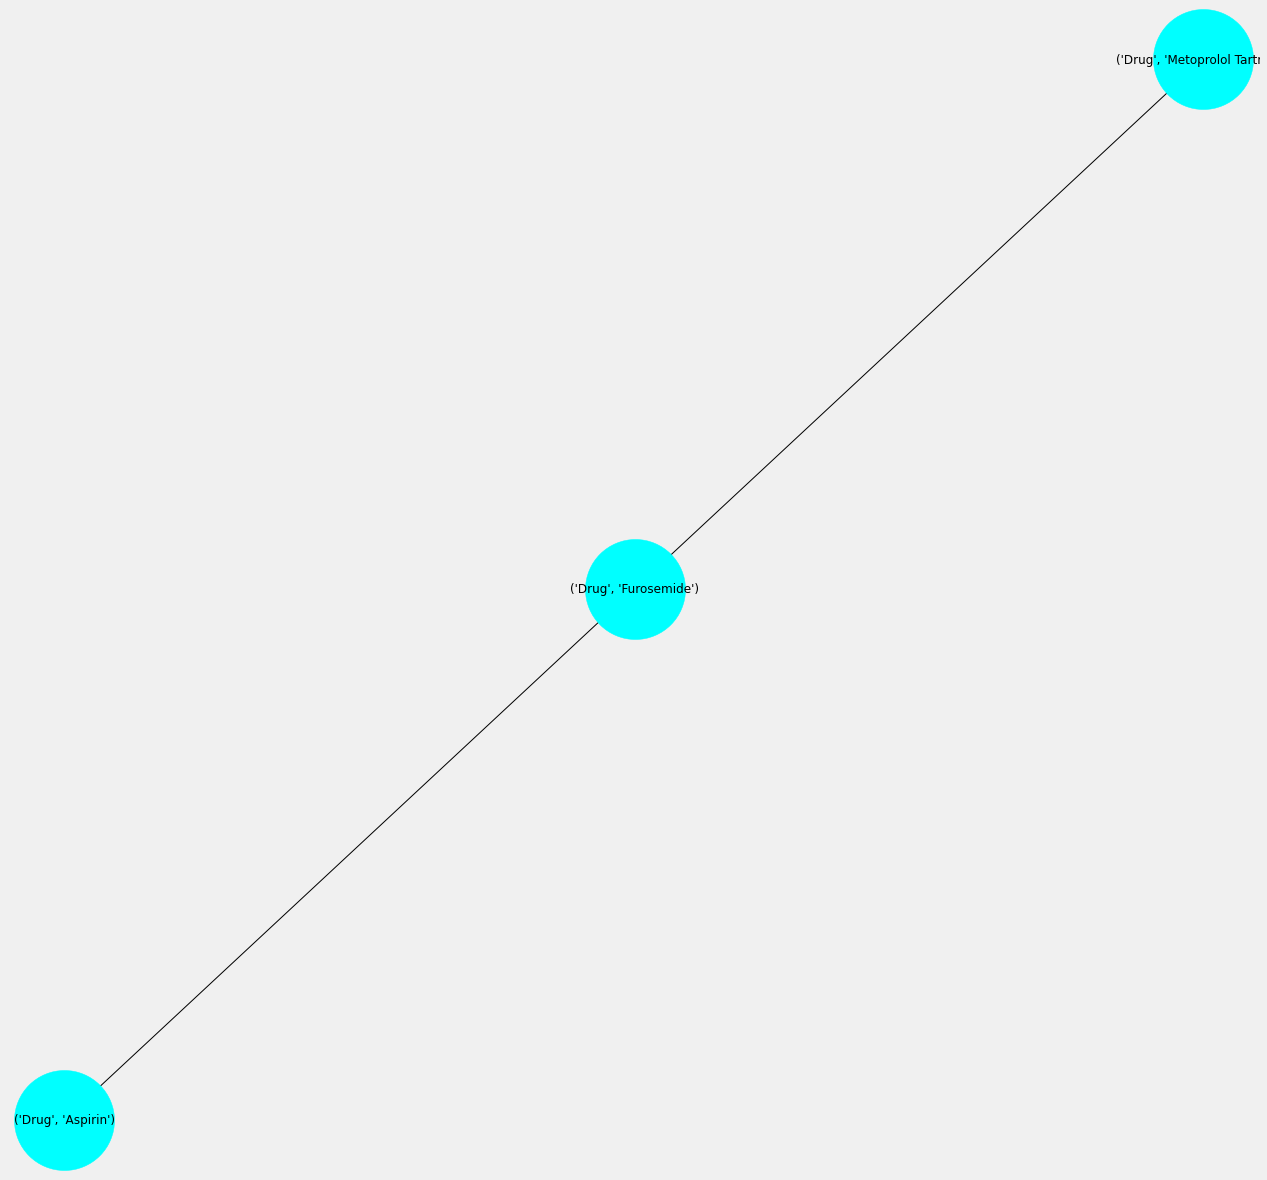

In [ ]:
# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
   
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()

        G.add_edges_from(self.visual, length = 0.5)
        nx.draw_networkx(G, node_size=10000, node_color='cyan')
        plt.grid(False)
        plt.show()
  
# Driver code
G = GraphVisualization()
G.addEdge("('Drug', 'Furosemide')", "('Drug', 'Aspirin')")
G.addEdge("('Drug', 'Furosemide')", "('Drug', 'Metoprolol Tartrate')")
G.visualize()